In [1]:
include("../partitions.jl")
using ProgressMeter, Plots
Random.seed!(2025)

TaskLocalRNG()

In [2]:
k = 10
n = 10^k
reps = 200


200

In [3]:
lumped = lumped_burnside(n, reps)
reflected = reflected_burnside(n, reps)

10000000000×200 SparseMatrixCSC{Integer, Int64} with 14996110 stored entries:
⎡⡏⠉⎤
⎢⠃⠀⎥
⎢⠀⠀⎥
⎢⠄⠀⎥
⎢⠄⠀⎥
⎢⠁⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎣⠀⠀⎦

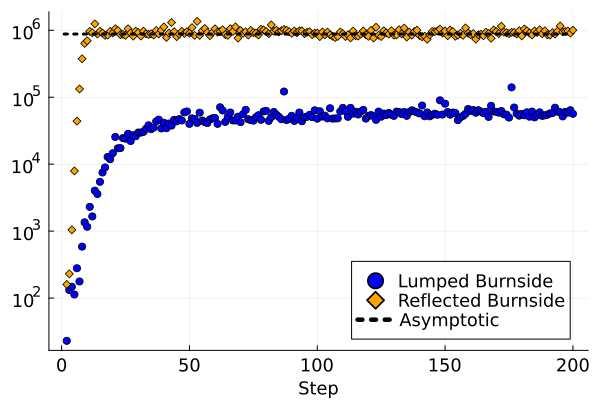

In [4]:
font_size=12
parts_lumped = [num_parts(lumped[:,i]) for i in 1:reps]
parts_reflected = [num_parts(reflected[:,i]) for i in 1:reps]
burn_in = 2
mu = log(sqrt(6*n)/pi)*sqrt(6*n)/pi
plt = scatter(burn_in:reps, 
        parts_lumped[burn_in:reps],
        label = "Lumped Burnside", 
        marker = (:circle, 4), 
        color = :blue,
        yscale = :log10,
        legend = :bottomright,
        xtickfontsize=font_size,
        ytickfontsize=font_size,
        formatter = identity,
        legendfontsize=font_size)
scatter!(plt,
burn_in:reps, 
        parts_reflected[burn_in:end], 
        label = "Reflected Burnside", 
        marker = (:diamond, 4), 
        color = :orange)
plot!(plt, 1:reps, ones(reps).* mu, linestyle=:dot, color =:black,  label="Asymptotic",linewidth=3)
xlabel!(plt, "Step", xguidefontsize=font_size)
savefig("../Figures/parts_comparision_1e$k.pdf")
plt

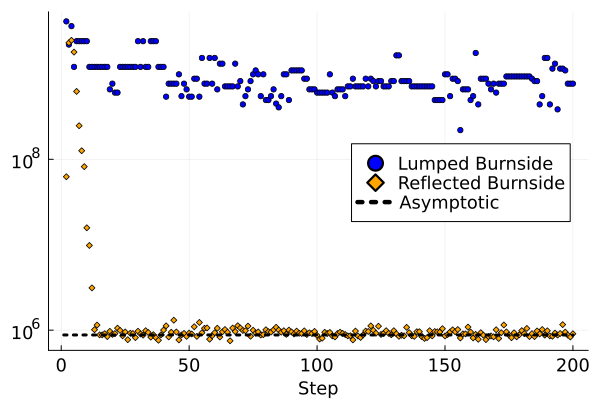

In [5]:
font_size=12
largest_lumped = [largest_part(lumped[:,i]) for i in 1:reps]
largest_reflected = [largest_part(reflected[:,i]) for i in 1:reps]
burn_in = 2
mu = log(sqrt(6*n)/pi)*sqrt(6*n)/pi
plt = scatter(burn_in:reps, 
        largest_lumped[burn_in:reps],
        label = "Lumped Burnside", 
        marker = (:circle, 3), 
        color = :blue,
        yscale =:log10,
        legend =:right,
        xtickfontsize=font_size,
        ytickfontsize=font_size,
        formatter = identity,
        legendfontsize=font_size)
scatter!(plt,
        burn_in:reps, 
        largest_reflected[burn_in:end], 
        label = "Reflected Burnside", 
        marker = (:diamond, 3), 
        color = :orange)
plot!(plt, 1:reps, ones(reps).* mu, linestyle=:dot, color =:black, label="Asymptotic",linewidth=3)
xlabel!(plt, "Step", xguidefontsize=font_size)
savefig("../Figures/largest_comparision_1e$k.pdf")
plt